In [34]:
import sys
sys.path.append('D:/codework/python/pythonReptile/')
from 城市字典 import city_to_province_region
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
from pyecharts.charts import Map
from pyecharts import options as opts

In [35]:
# 文件路径
file_path = 'D:/junior_year_1st/商务数据分析/项目/数据采集/re_月、保值率.xlsx'

# 加载Sheet1数据
data = pd.read_excel(file_path, sheet_name='Sheet1')

# 查看数据结构
print(data.head())

                             标题                                     信息_链接  \
0  2022款 宋MAX新能源 DM-i 105KM 尊荣型  https://www.che300.com/buycar/x381395378   
1         2021款 宋PLUS新能源 EV 尊贵型  https://www.che300.com/buycar/x379073799   
2        2019款 元新能源 EV360 智联悦尚型  https://www.che300.com/buycar/x379582661   
3        2018款 元新能源 EV360 智联尚酷型  https://www.che300.com/buycar/x380525134   
4           2017款 秦新能源 100 1.5T  https://www.che300.com/buycar/x375118138   

    品牌 系列 能源类型  油耗/L  里程/万公里 售价/万元 新车价格/万元    折价额  ...  距今的上牌天数 距今的上牌月数  \
0  比亚迪  宋   油电  2.01     0.8  8.28   15.78   7.50  ...    366.0      12   
1  比亚迪  宋   纯电     0     4.2  8.85   18.68   9.83  ...    853.0      28   
2  比亚迪  元   纯电     0     6.0   3.2   10.58   7.38  ...   2161.0      72   
3  比亚迪  元   纯电     0     8.0   3.2    7.99   4.79  ...   2192.0      73   
4  比亚迪  秦   油电   1.2     5.0   3.8   17.39  13.59  ...   2375.0      79   

   车辆所属地    排量        变速箱  颜色      类别 座位数      整车质保   车型  
0     宁波  1.5L  E-CVT无级变速  

In [ ]:
# 映射城市到省份和区域
data["省份"] = data["车辆所属地"].map(lambda x: city_to_province_region.get(x, {}).get("province", "未知"))
data["区域"] = data["车辆所属地"].map(lambda x: city_to_province_region.get(x, {}).get("region", "未知"))


# 查看更新后的数据
print(data[["车辆所属地", "省份", "区域", "保值率"]].head())


  车辆所属地   省份  区域       保值率
0    宁波  浙江省  华东  0.524715
1    武汉  湖北省  华中  0.473769
2    青岛  山东省  华东  0.302457
3    青岛  山东省  华东  0.400501
4    上海  上海市  华东  0.218516


In [37]:
# 按省份计算保值率统计信息
province_stats = data.groupby("省份")["保值率"].agg(["mean", "max", "min", "count"]).reset_index()
province_stats.rename(columns={"mean": "保值率均值", "max": "保值率最大值", "min": "保值率最小值", "count": "样本量"}, inplace=True)

# 查看聚合结果
print(province_stats)

      省份     保值率均值    保值率最大值    保值率最小值   样本量
0    上海市  0.487252  1.088468  0.088950   325
1    云南省  0.603021  1.041589  0.253502    48
2    内蒙古  0.578567  0.902729  0.125367    33
3    北京市  0.446268  0.991677  0.114439   156
4    吉林省  0.657987  0.967949  0.197715    46
5    四川省  0.585067  0.996332  0.155686   131
6    天津市  0.482817  1.130558  0.089529   111
7     宁夏  0.633430  0.956264  0.225352    18
8    安徽省  0.558170  0.997740  0.198799   161
9    山东省  0.501322  0.962134  0.068195   365
10   山西省  0.508160  1.053568  0.200337    71
11   广东省  0.474327  1.252459  0.086033   666
12    广西  0.571483  0.960699  0.149227   119
13    新疆  0.693014  0.912836  0.346256    17
14    未知  0.597934  1.066126  0.155686   206
15   江苏省  0.567652  4.764228  0.128903   382
16   江西省  0.572397  1.155720  0.316109   109
17   河北省  0.551400  1.000000  0.171551   164
18   河南省  0.595257  1.104154  0.046012   287
19   浙江省  0.539891  1.552712  0.056096  1004
20   海南省  0.552067  1.093168  0.268402    48
21   湖北省  

In [38]:
# 按区域计算保值率统计信息
region_stats = data.groupby("区域")["保值率"].agg(["mean", "max", "min", "count"]).reset_index()
region_stats.rename(columns={"mean": "保值率均值", "max": "保值率最大值", "min": "保值率最小值", "count": "样本量"}, inplace=True)

# 查看聚合结果
print(region_stats)

   区域     保值率均值    保值率最大值    保值率最小值   样本量
0  东北  0.586531  1.306789  0.094223   218
1  华东  0.535305  4.764228  0.056096  2417
2  华中  0.570288  1.104154  0.046012   512
3  华北  0.502453  1.130558  0.089529   535
4  华南  0.492686  1.252459  0.086033   833
5  未知  0.597934  1.066126  0.155686   206
6  西北  0.589860  0.956264  0.105117   193
7  西南  0.573088  1.173809  0.107391   327


In [39]:
print("region_stats条数（行数）为:", len(region_stats))
print("region_stats的存储形式:", type(region_stats))
print(region_stats.head(5))

region_stats条数（行数）为: 8
region_stats的存储形式: <class 'pandas.core.frame.DataFrame'>
   区域     保值率均值    保值率最大值    保值率最小值   样本量
0  东北  0.586531  1.306789  0.094223   218
1  华东  0.535305  4.764228  0.056096  2417
2  华中  0.570288  1.104154  0.046012   512
3  华北  0.502453  1.130558  0.089529   535
4  华南  0.492686  1.252459  0.086033   833


In [40]:
print("province_stats条数（行数）为:", len(province_stats))
print("province_stats的存储形式:", type(province_stats))
print(province_stats.head(5))

province_stats条数（行数）为: 31
province_stats的存储形式: <class 'pandas.core.frame.DataFrame'>
    省份     保值率均值    保值率最大值    保值率最小值  样本量
0  上海市  0.487252  1.088468  0.088950  325
1  云南省  0.603021  1.041589  0.253502   48
2  内蒙古  0.578567  0.902729  0.125367   33
3  北京市  0.446268  0.991677  0.114439  156
4  吉林省  0.657987  0.967949  0.197715   46


In [41]:
print("data条数（行数）为:", len(data))
print("data:", type(data))
print(data.head(5))

data条数（行数）为: 5277
data: <class 'pandas.core.frame.DataFrame'>
                             标题                                     信息_链接  \
0  2022款 宋MAX新能源 DM-i 105KM 尊荣型  https://www.che300.com/buycar/x381395378   
1         2021款 宋PLUS新能源 EV 尊贵型  https://www.che300.com/buycar/x379073799   
2        2019款 元新能源 EV360 智联悦尚型  https://www.che300.com/buycar/x379582661   
3        2018款 元新能源 EV360 智联尚酷型  https://www.che300.com/buycar/x380525134   
4           2017款 秦新能源 100 1.5T  https://www.che300.com/buycar/x375118138   

    品牌 系列 能源类型  油耗/L  里程/万公里 售价/万元 新车价格/万元    折价额  ...  车辆所属地    排量  \
0  比亚迪  宋   油电  2.01     0.8  8.28   15.78   7.50  ...     宁波  1.5L   
1  比亚迪  宋   纯电     0     4.2  8.85   18.68   9.83  ...     武汉    --   
2  比亚迪  元   纯电     0     6.0   3.2   10.58   7.38  ...     青岛    --   
3  比亚迪  元   纯电     0     8.0   3.2    7.99   4.79  ...     青岛    --   
4  比亚迪  秦   油电   1.2     5.0   3.8   17.39  13.59  ...     上海  1.5T   

         变速箱  颜色      类别 座位数      整车质保   车型   省份

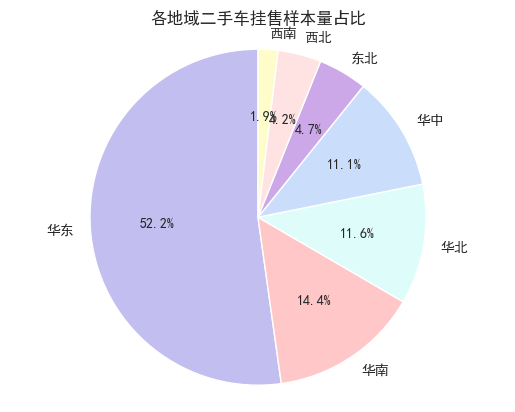

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设region_stats是这样的list结构（示例，当前每个子列表只有2个元素不符合要求）
region_stats = [
    ["华东", 2417],
    ["华南", 666],
    ["华北", 535],
    ["华中", 512],
    ["东北", 218],
    ["西北", 193],
    ["西南", 88]
]


new_region_stats = []
for item in region_stats:
    region = item[0]
    sample_count = item[1]
    new_item = [region, 0.0, 0.0, 0.0, sample_count]  
    new_region_stats.append(new_item)

columns = ["区域", "保值率均值", "保值率最大值", "保值率最小值", "样本量"]

region_stats_df = pd.DataFrame(new_region_stats, columns=columns)
sizes = region_stats_df["样本量"]
labels = region_stats_df["区域"]
color_dict = {
    "东北": "#cca8e9",
    "华东": "#c3bef0",
    "华中": "#cadefc",
    "华北": "#defcf9",
    "华南": "#ffc7c7",
    "西北": "#ffe2e2",
    "西南": "#fefdca"
}
colors = [color_dict[label] for label in labels]
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors  # 设置为自定义的颜色列表
)

plt.axis('equal')
plt.title('各地域二手车挂售样本量占比')
plt.show()

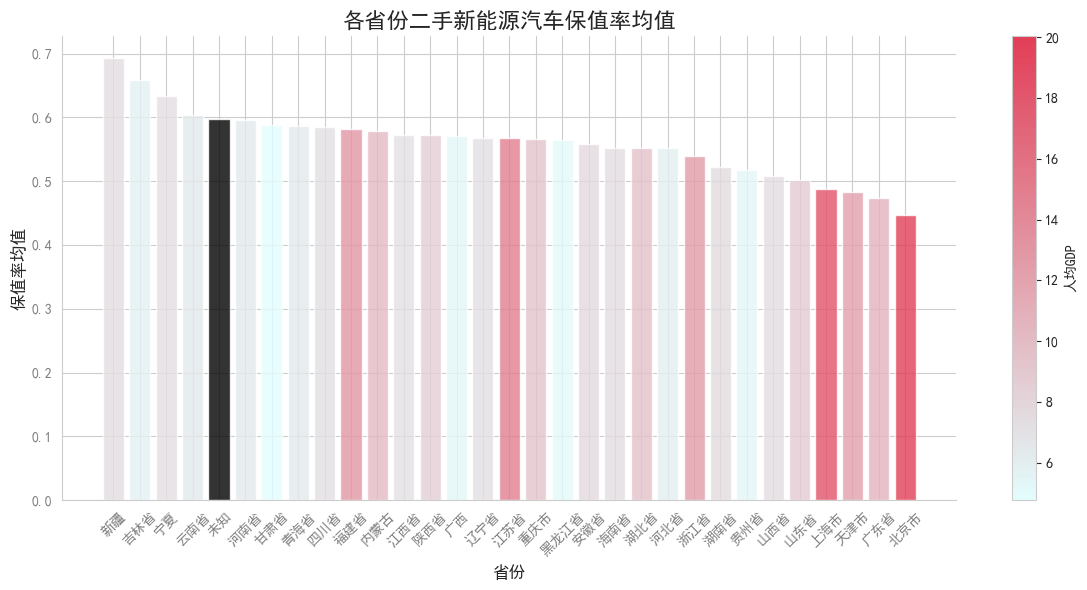

In [55]:

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 示例：2023年各省份 GDP 数据
gdp_data_2023 = {
    "北京市": 20.05,  # 这里示例数据假设经过准确计算后的值为20.05（单位：万元/人，仅示例）
    "天津市": 12.25,  
    "河北省": 5.92,
    "山西省": 7.38,
    "内蒙古": 10.25,
    "辽宁省": 7.20,
    "吉林省": 5.75,
    "黑龙江省": 5.13,
    "上海市": 18.33,
    "江苏省": 14.92,
    "浙江省": 12.56,
    "安徽省": 7.69,
    "福建省": 12.99,
    "江西省": 7.11,
    "山东省": 8.86,
    "河南省": 6.28,
    "湖北省": 9.55,
    "湖南省": 7.57,
    "广东省": 10.72,
    "广西": 5.39,
    "海南省": 7.40,
    "重庆市": 9.37,
    "四川省": 7.17,
    "贵州省": 5.42,
    "云南省": 6.39,
    "西藏": 6.58,
    "陕西省": 8.54,
    "甘肃省": 4.77,
    "青海省": 6.39,
    "宁夏": 7.29,
    "新疆": 7.38
}


province_stats = province_stats.sort_values("保值率均值", ascending=False)
gdp_values = province_stats["省份"].map(gdp_data_2023)

# 归一化 GDP 数据到 [0, 1] 区间，用于颜色映射
norm = plt.Normalize(gdp_values.min(), gdp_values.max())
# 创建渐变色
cmap = mcolors.LinearSegmentedColormap.from_list("gdp_cmap", ['#e3fdfd', '#e23e57'])
colors = cmap(norm(gdp_values))
# 设置绘图风格
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制柱状图
plt.figure(figsize=(12, 6))
plt.bar(province_stats["省份"], province_stats["保值率均值"], color=colors, alpha=0.8)
plt.title("各省份二手新能源汽车保值率均值", fontsize=16)
plt.xlabel("省份", fontsize=12)
plt.ylabel("保值率均值", fontsize=12)
plt.xticks(rotation=45)
# 隐藏顶部和右侧边框
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 调整刻度标签的字体大小和颜色
plt.xticks(fontsize=10, color='gray')
plt.yticks(fontsize=10, color='gray')
# 添加颜色条（图例）
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.ax.set_ylabel('人均GDP', rotation=90)
plt.tight_layout()
plt.show()